In [8]:
from fastai.vision import *
import zipfile
import numpy
import os
path = Path('data/artData')

In [14]:
myfile = 'art-team2-121-julia-kaggle_data.zip'
with zipfile.ZipFile(path/myfile,'r') as zip_ref:
    zip_ref.extractall(path)

OSError: [Errno 28] No space left on device

In [23]:
path = Path('data/art-team2-121-julia-kaggle_data/data')
classes = []
for root, dirs, files in os.walk(path, topdown=True):
    for name in dirs:
        classes.append(name)
print(classes)

['Analytical Cubism', 'Art Deco', 'Abstract Expressionism', 'Academicism', 'Art Brut', 'Art Informel', 'Abstract Art', 'Art Nouveau (Modern)', 'Analytical Realism', 'American Realism', 'Action painting']


In [24]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Analytical Cubism


Art Deco


Abstract Expressionism


Academicism


Art Brut


Art Informel


Abstract Art


Art Nouveau (Modern)


tuple index out of range
Analytical Realism


American Realism


Action painting


In [25]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=16, num_workers=4).normalize(imagenet_stats)

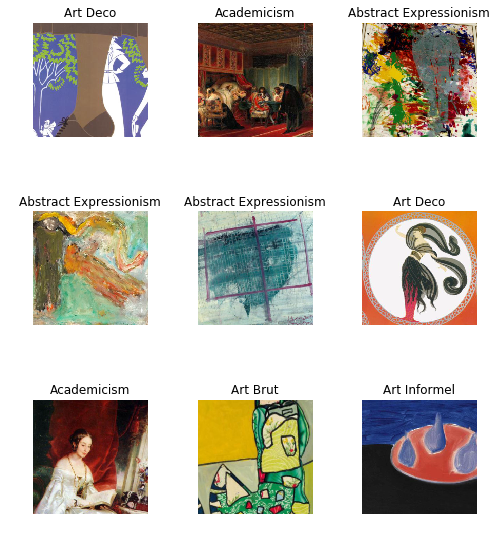

In [26]:
data.show_batch(rows=3, figsize=(7,8))

In [27]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Abstract Art',
  'Abstract Expressionism',
  'Academicism',
  'Action painting',
  'American Realism',
  'Analytical Cubism',
  'Analytical Realism',
  'Art Brut',
  'Art Deco',
  'Art Informel',
  'Art Nouveau (Modern)'],
 11,
 637,
 159)

In [28]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [29]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.742211,2.316763,0.496855,00:15
1,2.097357,1.805274,0.515723,00:11
2,1.544264,1.558764,0.477987,00:10
3,1.193675,1.526029,0.446541,00:11


In [30]:
interp = ClassificationInterpretation.from_learner(learn)

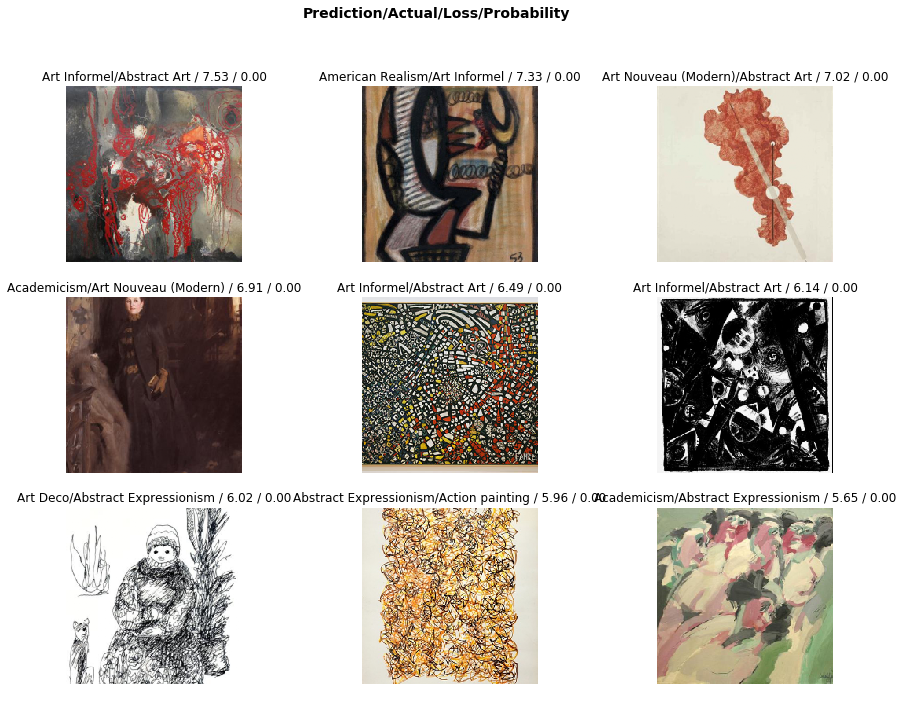

In [31]:
interp.plot_top_losses(9, figsize=(15,11))

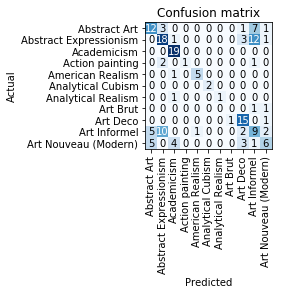

In [32]:
interp.plot_confusion_matrix()